<a href="https://colab.research.google.com/github/lexabak3/Kaggle/blob/main/Titanic%20-%20Machine%20Learning%20from%20Disaster/Titanic_Machine_Learning_from_Disaster.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import sys
sys.path.append('drive/MyDrive/')

In [4]:
from my_python_lib.roc_auc_lib import *

In [5]:
def new_age(row):
    if row.Age > 64:
        row.c_age = 3
    elif row.Age < 10:
        row.c_age = 1
    elif row.Age >= 10 and row.Age <= 64:
        row.c_age = 2
    else: 
        row.c_age = -1
    return row

In [6]:
path_ = 'drive/MyDrive/Kaggle/Titanic/DATA/'

In [7]:
os.listdir(path_)

['train.csv', 'test.csv']

In [8]:
df = pd.read_csv(path_+'train.csv', index_col='PassengerId')

In [9]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


# **Graphical data analysis**

### Age

In [29]:
df['age_null'] = 0
df.loc[df[df.Age.isnull() == True].index,'age_null'] = 1

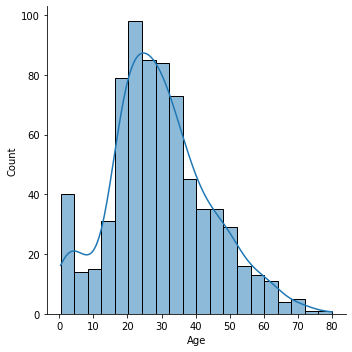

In [11]:
sns.displot(x=df.Age, kde=True);

### Age + Survived

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


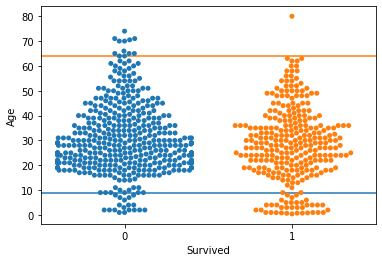

In [12]:
sns.swarmplot(y=df.Age, x=df.Survived)
plt.plot([-1,2], [9]*2)
plt.plot([-1,2], [64]*2)

### Pclass + Age + Survived + Sex

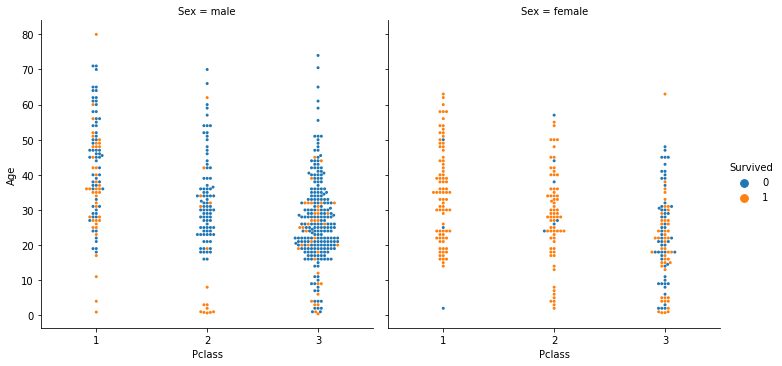

In [13]:
sns.catplot(x="Pclass", y="Age", hue="Survived", kind="swarm",
            col='Sex', data=df, s = 3);

### Fare

In [23]:
df['c_fare'] = pd.factorize(pd.qcut(df.Fare, 10))[0]/10

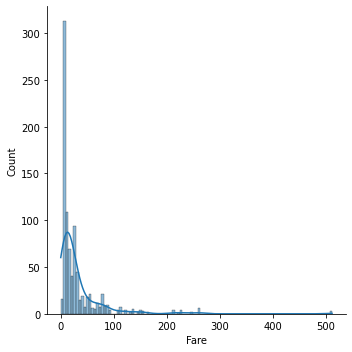

In [15]:
sns.displot(x=df.Fare, kde=True);

### Fare + Survived

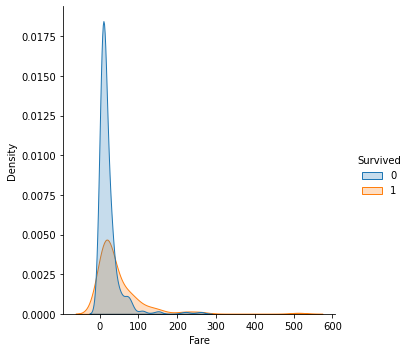

In [16]:
sns.displot(data=df, x='Fare', hue='Survived',
            kind='kde',
            fill=True);

### Pclass + Fare + Survived + Sex

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 11.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 57.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 37.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


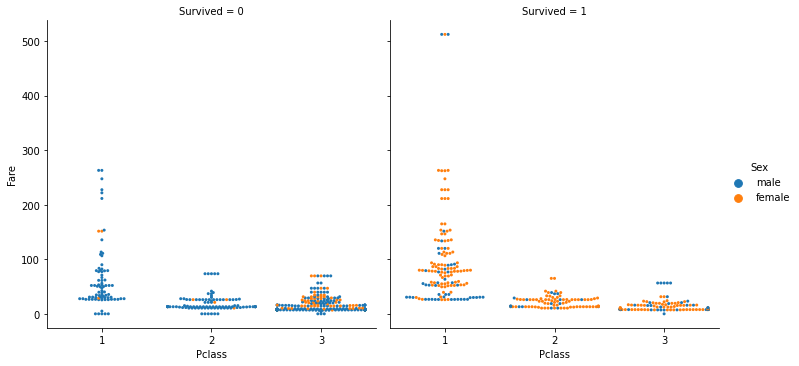

In [17]:
sns.catplot(x="Pclass", y="Fare", hue='Sex',
            kind="swarm", col='Survived', data=df, s = 3)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 9.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 31.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 66.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 31.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


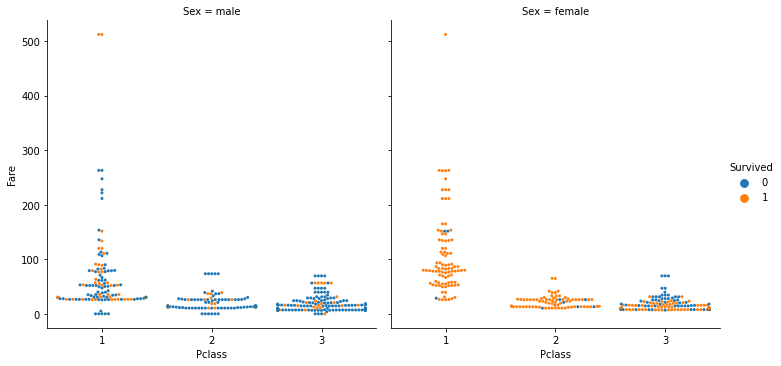

In [18]:
sns.catplot(x="Pclass", y="Fare", hue="Survived",
            kind="swarm", col='Sex', data=df, s = 3)

### Grouped Fare

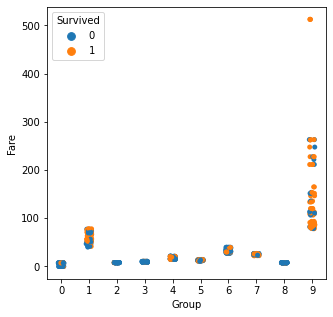

In [30]:
tmp_df = df.groupby(['c_fare','Survived']).size().to_frame()
tmp_df['prc'] = tmp_df.groupby(level=0).transform(lambda x: (x / x.sum()).round(2))
tmp_df = tmp_df.reset_index()

plt.figure(figsize=(5,5))
sns.stripplot(x="c_fare", y="Fare", hue="Survived", data=df)
plt.xticks(range(len(tmp_df.c_fare.unique())), range(len(tmp_df.c_fare.unique())))
plt.xlabel("Group")
plt.show()

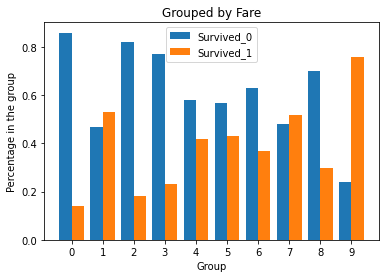

In [21]:
# df['c_fare'] = pd.qcut(df.Fare, 10)

Survived_0 = tmp_df[tmp_df.Survived == 0].prc.to_numpy()
Survived_1 = tmp_df[tmp_df.Survived == 1].prc.to_numpy()
list_c_fare = [str(x) for x in tmp_df.c_fare.unique().astype('str')]
X_axis = np.arange(len(list_c_fare))

plt.bar(X_axis - 0.2, Survived_0, 0.4, label = 'Survived_0')
plt.bar(X_axis + 0.2, Survived_1, 0.4, label = 'Survived_1')
  
plt.xticks(X_axis, X_axis)
plt.xlabel("Group")
plt.ylabel("Percentage in the group")
plt.title('Grouped by Fare')
plt.legend()
plt.show()

### Grouped Fare + Age (Null/Not Null)

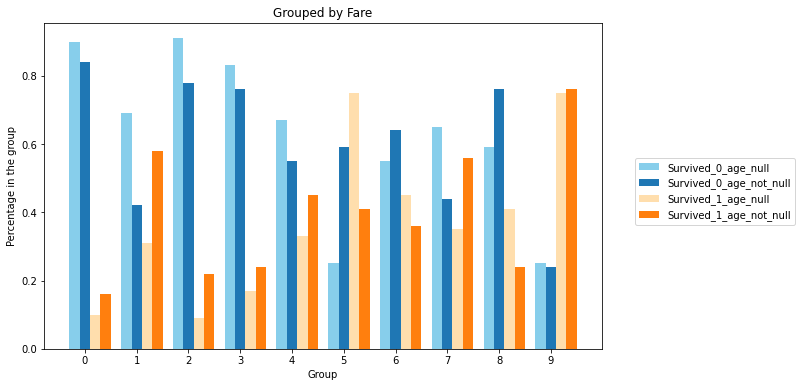

In [31]:
tmp_df = df[df.age_null==1].groupby(['c_fare','Survived']).size().to_frame()
tmp_df['prc'] = tmp_df.groupby(level=0).transform(lambda x: (x / x.sum()).round(2))
tmp_df = tmp_df.reset_index()

Survived_0_age_null = tmp_df[tmp_df.Survived == 0].prc.to_numpy()
Survived_1_age_null = tmp_df[tmp_df.Survived == 1].prc.to_numpy()

tmp_df = df[df.age_null==0].groupby(['c_fare','Survived']).size().to_frame()
tmp_df['prc'] = tmp_df.groupby(level=0).transform(lambda x: (x / x.sum()).round(2))
tmp_df = tmp_df.reset_index()

Survived_0_age_not_null = tmp_df[tmp_df.Survived == 0].prc.to_numpy()
Survived_1_age_not_null = tmp_df[tmp_df.Survived == 1].prc.to_numpy()

list_c_fare = [str(x) for x in tmp_df.c_fare.unique().astype('str')]
X_axis = np.arange(len(list_c_fare))

plt.figure(figsize=(10,6))

plt.bar(X_axis - 0.2, Survived_0_age_null, width = 0.2,
        color='skyblue',
        label = 'Survived_0_age_null')
plt.bar(X_axis + 0.0, Survived_0_age_not_null, width = 0.2,
        color='tab:blue',
        label = 'Survived_0_age_not_null')
plt.bar(X_axis + 0.2, Survived_1_age_null, width = 0.2,
        color='navajowhite',
        label = 'Survived_1_age_null')
plt.bar(X_axis + 0.4, Survived_1_age_not_null, width = 0.2,
        color='tab:orange',
        label = 'Survived_1_age_not_null')

plt.xticks(X_axis, X_axis)
plt.xlabel("Group")
plt.ylabel("Percentage in the group")
plt.title('Grouped by Fare')
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show()


### Fare + Sex

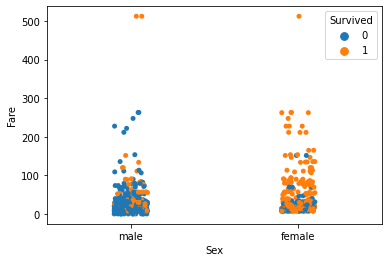

In [32]:
sns.stripplot(x="Sex", y="Fare", hue="Survived", data=df);

### Age + Fare

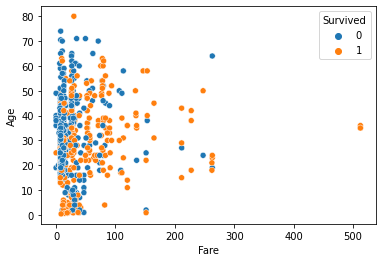

In [33]:
sns.scatterplot(y=df["Age"], x=df["Fare"], hue=df["Survived"]);

### Pclass + Survived

count   prc
Pclass Survived             
1      0            80  0.37
       1           136  0.63
2      0            97  0.53
       1            87  0.47
3      0           372  0.76
       1           119  0.24

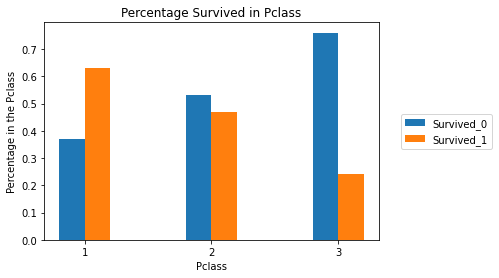

In [34]:
tmp_df = df.groupby(['Pclass','Survived']).size().to_frame()
tmp_df.columns = ['count']
tmp_df['prc'] = tmp_df.groupby(level=0).transform(
    lambda x:(x/x.sum()).round(2))
display(tmp_df)
tmp_df = tmp_df.reset_index()

Survived_0 = tmp_df[tmp_df.Survived == 0].prc.to_numpy()
Survived_1 = tmp_df[tmp_df.Survived == 1].prc.to_numpy()
list_pclass = [str(x) for x in tmp_df.Pclass.unique().astype('str')]
X_axis = np.arange(len(list_pclass))

plt.bar(X_axis - 0.1, Survived_0, 0.2, label = 'Survived_0')
plt.bar(X_axis + 0.1, Survived_1, 0.2, label = 'Survived_1')

plt.xticks(X_axis, list_pclass)
plt.xlabel("Pclass")
plt.ylabel("Percentage in the Pclass")
plt.title('Percentage Survived in Pclass')
plt.legend(bbox_to_anchor = (1.05, 0.6))
plt.show()

# **Preprocessing**

In [35]:
df['age_null'] = 0
df.loc[df[df.Age.isnull() == True].index,'age_null'] = 1

df['name_Mr'] = np.where(df.Name.str.find('Mr.') == -1, 0, 1)
df['name_Mrs'] = np.where(df.Name.str.find('Mrs.') == -1, 0, 1)
df['name_Miss'] = np.where(df.Name.str.find('Miss.') == -1, 0, 1)
df['cabin_null'] = np.where(df.Cabin.fillna(-1) == -1, 1, 0)
df['sex_num'] = np.where(df.Sex == 'male', 1, 0)
df['c_age'] = 0
df = df.apply(new_age, axis=1, )
df['Embarked_num'], _ = pd.factorize(df.Embarked)
df['c_fare'] = pd.factorize(pd.qcut(df.Fare, 10))[0]/10

y = df['Survived'].to_numpy()
f_col = ['Pclass', 'SibSp', 'c_fare', 'Parch', 'age_null', 'name_Mr',
        'name_Mrs', 'name_Miss', 'cabin_null', 'sex_num', 'c_age',
        'Embarked_num']
X = df[f_col].to_numpy()
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_null,c_fare,name_Mr,name_Mrs,name_Miss,cabin_null,sex_num,c_age,Embarked_num
PassengerId,,,,,,,,,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0.0,1,0,0,1,1,2,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0,0.1,0,1,0,0,0,2,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0.2,0,0,1,1,0,2,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0.1,0,1,0,0,0,2,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0.2,1,0,0,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,0,0.5,0,0,0,1,1,2,0
888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,0,0.6,0,0,1,0,0,2,0
889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,1,0.7,0,0,1,1,0,-1,0


In [36]:
# Col for LogisticRegression 
# print(f_col)
display(df[f_col].describe())

,Pclass,SibSp,c_fare,Parch,age_null,name_Mr,name_Mrs,name_Miss,cabin_null,sex_num,c_age,Embarked_num
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,0.523008,0.443883,0.381594,0.198653,0.580247,0.140292,0.204265,0.771044,0.647587,1.346801,0.359147
std,0.836071,1.102743,0.288729,0.806057,0.399210,0.493796,0.347485,0.403390,0.420397,0.477990,1.201983,0.638707
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000
25%,2.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
50%,3.000000,0.000000,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,0.000000
75%,3.000000,1.000000,0.700000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000
max,3.000000,8.000000,0.900000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000


## Feature Importance (Random Forest)

In [37]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
f_col_new = [x for x in f_col 
             if x not in ['name_Mr', 'age_null'
             , 'cabin_null', 'name_Mrs', 'name_Miss']]

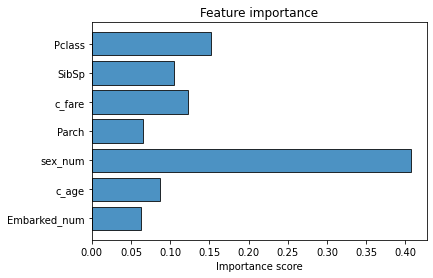

In [39]:
y = df['Survived'].to_numpy()
X = df[f_col_new].to_numpy()

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X, y)

rffi = rf.feature_importances_

fig, ax = plt.subplots()

ax.barh(f_col_new, rffi, height=0.8, alpha=0.8, edgecolor='k')
ax.set_xlabel('Importance score')
ax.set_title('Feature importance')
plt.gca().invert_yaxis()


## Correlation matrix of features

In [40]:
f_col_new = [x for x in f_col 
             if x not in ['name_Mr', 'age_null'
             , 'cabin_null', 'name_Mrs', 'name_Miss']]

Determinants 0.3198


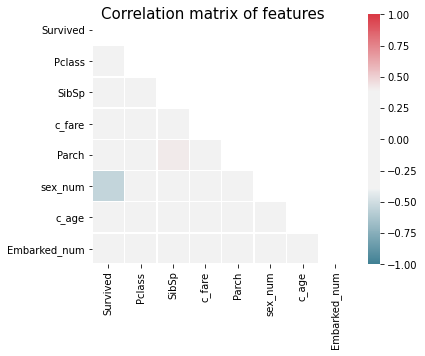

In [41]:
df_corr = df[['Survived'] + f_col_new].corr()

mask = np.zeros_like(df_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(6, 5))

cmap = sns.diverging_palette(220, 10, as_cmap=True, sep=100)

sns.heatmap(df_corr, mask=mask, cmap=cmap, vmin=-1, vmax=1,
            center=0, linewidths=.5)

fig.suptitle('Correlation matrix of features', fontsize=15)

fig.tight_layout()
print(f'Determinants {round(np.linalg.det(df_corr.to_numpy()), 4)}')

# **Creating Models**

## 1. LogisticRegression

In [42]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [43]:
f_col_new = [x for x in f_col 
             if x not in ['name_Mr', 'age_null'
             , 'cabin_null', 'name_Mrs', 'name_Miss']]

y = df['Survived'].to_numpy()
X = df[f_col].to_numpy()

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X, y,
                                               test_size=0.25,
                                               random_state=0)

model = LogisticRegression(multi_class='multinomial',
                           solver='lbfgs', penalty='none')

model.fit(X_train,y_train)

y_pred=model.predict(X_test)
model_score = model.score(X,y)
model_p_p = model.predict_proba(X_test)
result_df = pd.DataFrame(model_p_p)
result_df['target'] = y_test
result_df.columns = ['prob_0', 'prob_1', 'target']

auc, gini, cf_row, cut_of = fast_analize_roc_conf_m_silence(
    result_df[['prob_1','target']],
    'Classification Model', 'prob_1')

# ['TN','FP','FN','TP']
print(round(model_score, 4), round(auc, 4), round(gini, 4), cf_row, cut_of)

0.8137 0.8649 0.7298 [104, 35, 12, 72] 0.345


0.8137 0.8649 0.7298 [104, 35, 12, 72] 0.345	>0.0000 0.814 (0.039)
0.6162 0.8465 0.693 [97, 42, 11, 73] 0.386	>0.0001 0.616 (0.004)
0.6655 0.8529 0.7058 [113, 26, 20, 64] 0.408	>0.0010 0.690 (0.030)
0.8036 0.8568 0.7136 [94, 45, 8, 76] 0.278	>0.0100 0.800 (0.041)
0.8058 0.8584 0.7169 [98, 41, 8, 76] 0.293	>0.1000 0.807 (0.046)
0.8137 0.8599 0.7199 [104, 35, 12, 72] 0.347	>1.0000 0.812 (0.043)


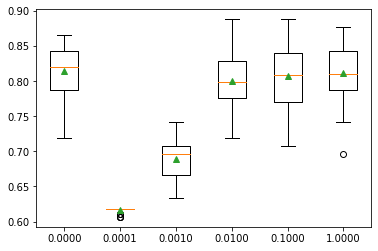

In [45]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
 

def get_models():
	models = dict()
	for p in [0.0, 0.0001, 0.001, 0.01, 0.1, 1.0]:
		key = '%.4f' % p
		if p == 0.0:
			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='none')
		else:
			models[key] = LogisticRegression(multi_class='multinomial', solver='lbfgs', penalty='l2', C=p)
	return models
 

def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
	return scores
 

models = get_models()
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    
    model.fit(X_train,y_train)
    y_pred=model.predict(X_test)
    model_score = model.score(X,y)
    model_p_p = model.predict_proba(X_test)
    result_df = pd.DataFrame(model_p_p)
    result_df['target'] = y_test
    result_df.columns = ['prob_0', 'prob_1', 'target']

    auc, gini, cf_row, cut_of = fast_analize_roc_conf_m_silence(result_df[['prob_1','target']],
                                  'Classification Model', 'prob_1')
    print(round(model_score, 4), round(auc, 4), round(gini, 4), cf_row, cut_of,
          end='\t')
	# summarize progress along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.show()

## CatBoost

In [46]:
!pip install catboost

In [47]:
from catboost import CatBoostRegressor
cat = CatBoostRegressor()

In [48]:
f_col_new = [x for x in f_col 
             if x not in ['name_Mr', 'age_null'
             , 'cabin_null', 'name_Mrs', 'name_Miss']]

y = df['Survived'].to_numpy()
X = df[f_col + ['Age', 'Fare']].to_numpy()

X_train,X_test,y_train,y_test=train_test_split(X, y,
                                               test_size=0.25,
                                               random_state=0)

In [49]:
cat.fit(X_train, y_train, verbose=False)
# tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
y_pred = cat.predict(X_test)
model_score = cat.score(X,y)

In [50]:
tn, fp, fn, tp = confusion_matrix(y_test, list(map(round, y_pred))).ravel()
print(round(model_score, 4), [tn, fp, fn, tp])

0.729 [123, 16, 22, 62]


In [51]:
from catboost import CatBoostClassifier
# Initialize data
cat_features = [0, 1]
train_data = [["a", "b", 1, 4, 5, 6],
              ["a", "b", 4, 5, 6, 7],
              ["c", "d", 30, 40, 50, 60]]
train_labels = [1, 1, -1]
eval_data = [["a", "b", 2, 4, 6, 8],
             ["a", "d", 1, 4, 50, 60]]

# Initialize CatBoostClassifier
model = CatBoostClassifier(silent=True)
# Fit model
model.fit(X_train,y_train)
# Get predicted classes
preds_class = model.predict(X_test)
# Get predicted probabilities for each class
preds_proba = model.predict_proba(X_test)

model_score = model.score(X,y)

result_df = pd.DataFrame(preds_proba)
result_df['target'] = y_test
result_df.columns = ['prob_0', 'prob_1', 'target']

auc, gini, cf_row, cut_of = fast_analize_roc_conf_m_silence(result_df[['prob_1','target']],
                                  'Classification Model', 'prob_1')
print(round(model_score, 4), round(auc, 4), round(gini, 4), cf_row, cut_of)

0.8911 0.872 0.744 [123, 16, 20, 64] 0.451


# Test Data

In [52]:
df = pd.read_csv(path_+'test.csv', index_col='PassengerId')

df['age_null'] = 0
df.loc[df[df.Age.isnull() == True].index,'age_null'] = 1

df['name_Mr'] = np.where(df.Name.str.find('Mr.') == -1, 0, 1)
df['name_Mrs'] = np.where(df.Name.str.find('Mrs.') == -1, 0, 1)
df['name_Miss'] = np.where(df.Name.str.find('Miss.') == -1, 0, 1)
df['cabin_null'] = np.where(df.Cabin.fillna(-1) == -1, 1, 0)
df['sex_num'] = np.where(df.Sex == 'male', 1, 0)
df['c_age'] = 0
df = df.apply(new_age, axis=1, )
df['Embarked_num'], _ = pd.factorize(df.Embarked)
df['c_fare'] = pd.factorize(pd.qcut(df.Fare, 10))[0]/10

f_col = ['Pclass', 'SibSp', 'c_fare', 'Parch', 'age_null', 'name_Mr',
        'name_Mrs', 'name_Miss', 'cabin_null', 'sex_num', 'c_age',
        'Embarked_num']
X = df[f_col + ['Age', 'Fare']].to_numpy()
df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_null,name_Mr,name_Mrs,name_Miss,cabin_null,sex_num,c_age,Embarked_num,c_fare
PassengerId,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,1,2,0,0.0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,0,1,0,2,1,0.1
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,1,2,0,0.2
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1,0,0,1,1,2,1,0.2
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,0,1,0,2,1,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,1,0,0,1,1,-1,1,0.0
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,0,0,0,0,0,2,2,0.6
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,1,0,0,1,1,2,1,0.1


In [53]:
display(df[f_col].describe())

,Pclass,SibSp,c_fare,Parch,age_null,name_Mr,name_Mrs,name_Miss,cabin_null,sex_num,c_age,Embarked_num
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.447368,0.445215,0.392344,0.205742,0.574163,0.172249,0.186603,0.782297,0.636364,1.339713,1.133971
std,0.841838,0.896760,0.294210,0.981429,0.404727,0.495062,0.378049,0.390059,0.413179,0.481622,1.213198,0.580452
min,1.000000,0.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000
25%,1.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,3.000000,0.000000,0.500000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000
75%,3.000000,1.000000,0.700000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000
max,3.000000,8.000000,0.900000,9.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,2.000000


In [54]:
predict = model.predict(X)

In [55]:
['PassengerId','Survived']

['PassengerId', 'Survived']

In [56]:
result = pd.DataFrame({'PassengerId': df.index.to_numpy(),'Survived':predict})

In [57]:
result.to_csv('result.csv', index=False, sep=',')

In [58]:
df['Survived'] = result['Survived'].to_numpy()

In [59]:
df

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_null,name_Mr,name_Mrs,name_Miss,cabin_null,sex_num,c_age,Embarked_num,c_fare,Survived
PassengerId,,,,,,,,,,,,,,,,,,,,
892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0,1,1,2,0,0.0,0
893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,0,1,0,2,1,0.1,0
894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,1,2,0,0.2,0
895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,1,0,0,1,1,2,1,0.2,0
896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,0,1,0,2,1,0.3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,1,1,0,0,1,1,-1,1,0.0,0
1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,0,0,0,0,0,0,2,2,0.6,1
1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,1,0,0,1,1,2,1,0.1,0
